<a href="https://colab.research.google.com/github/suji2804/PyTorch/blob/main/02_PyTorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##1. Make classification custom Data
import sklearn
from sklearn.datasets import make_circles
#make 1000 samples
n_samples = 1000

X,y = make_circles(n_samples,noise =0.03,
                  random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"\n sample of X :\n{X[:5]}")


 sample of X :
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [5]:
print(f"\n sample of y :\n{y[:5]}")


 sample of y :
[1 1 1 1 0]


In [6]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


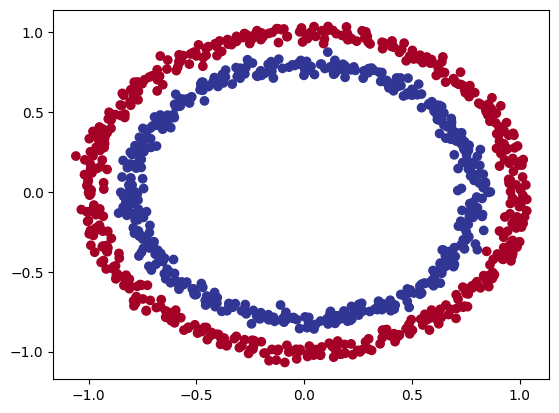

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [8]:
#turn data into tensors
import torch
from torch import nn
print(torch.__version__)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5],y[:5]

2.6.0+cu124


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [11]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,out_features=5)# x has 2 features and scales up to 5 in hidden layer
    self.layer2 = nn.Linear(in_features=5,out_features=1)# has in features 5 same as previous layer and output as 1, which is shape of y.

  def forward(self, x):
    return self.layer2(self.layer1(x)) # x->layer1->layer2 ->output

model_0 = CircleModelV0()
model_0


CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [12]:
model_0 = nn.Sequential(
          nn.Linear(in_features=2, out_features=10, bias=True),
          nn.Linear(in_features=10, out_features=1, bias=True)
)
model_0


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.2495, -0.1594],
         [-0.0885, -0.5817],
         [-0.4428, -0.3557],
         [-0.5592, -0.6903],
         [ 0.6079, -0.3373],
         [ 0.5716, -0.2333],
         [-0.3297, -0.5863],
         [ 0.0495, -0.2343],
         [ 0.1015,  0.4933],
         [-0.4646, -0.0171]], requires_grad=True),
 Parameter containing:
 tensor([-0.4801,  0.5545,  0.6705, -0.0085, -0.3369, -0.0289, -0.3957, -0.2413,
          0.1456,  0.0807], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1072, -0.2729,  0.0829,  0.1108,  0.1156, -0.1385,  0.2984,  0.3089,
           0.1013,  0.0356]], requires_grad=True),
 Parameter containing:
 tensor([0.2415], requires_grad=True)]

In [14]:
#make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2495, -0.1594],
                      [-0.0885, -0.5817],
                      [-0.4428, -0.3557],
                      [-0.5592, -0.6903],
                      [ 0.6079, -0.3373],
                      [ 0.5716, -0.2333],
                      [-0.3297, -0.5863],
                      [ 0.0495, -0.2343],
                      [ 0.1015,  0.4933],
                      [-0.4646, -0.0171]])),
             ('0.bias',
              tensor([-0.4801,  0.5545,  0.6705, -0.0085, -0.3369, -0.0289, -0.3957, -0.2413,
                       0.1456,  0.0807])),
             ('1.weight',
              tensor([[ 0.1072, -0.2729,  0.0829,  0.1108,  0.1156, -0.1385,  0.2984,  0.3089,
                        0.1013,  0.0356]])),
             ('1.bias', tensor([0.2415]))])

In [15]:
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Length of untrained_preds: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of untrained_preds: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1571],
        [-0.2819],
        [ 0.0768],
        [-0.2230],
        [-0.0712],
        [-0.1463],
        [-0.3803],
        [-0.3489],
        [ 0.0827],
        [-0.2919]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [16]:
#train the model
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [17]:
def accuracy(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


### Model outputs are going to be raw-(no activation ) logitis
we convert these logitis into prediction probabilities

then we can convert prediction probabilities to prediction labels by either

In [18]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.1571],
        [-0.2819],
        [ 0.0768],
        [-0.2230],
        [-0.0712]])

In [19]:
#use sigmoid activation function on our logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4608],
        [0.4300],
        [0.5192],
        [0.4445],
        [0.4822]])

In [20]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [21]:
torch.manual_seed(42)
epochs= 100
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits,y_train)
  acc = accuracy(y_true=y_train,y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test,y_pred=test_pred)

  if epoch %10 ==0:
    print(f"Epoch:{epoch} |Loss {loss:.5f}, | Acc: {acc:.5f}  | test_loss: {test_loss:.5f} | test_acc :{test_acc:.5f}")




Epoch:0 |Loss 0.69954, | Acc: 46.00000  | test_loss: 0.69299 | test_acc :53.00000
Epoch:10 |Loss 0.69659, | Acc: 47.25000  | test_loss: 0.69173 | test_acc :52.50000
Epoch:20 |Loss 0.69509, | Acc: 47.50000  | test_loss: 0.69161 | test_acc :53.00000
Epoch:30 |Loss 0.69425, | Acc: 48.00000  | test_loss: 0.69188 | test_acc :53.00000
Epoch:40 |Loss 0.69376, | Acc: 48.75000  | test_loss: 0.69227 | test_acc :52.50000
Epoch:50 |Loss 0.69346, | Acc: 49.00000  | test_loss: 0.69267 | test_acc :49.00000
Epoch:60 |Loss 0.69328, | Acc: 49.25000  | test_loss: 0.69304 | test_acc :47.50000
Epoch:70 |Loss 0.69316, | Acc: 49.87500  | test_loss: 0.69336 | test_acc :48.00000
Epoch:80 |Loss 0.69309, | Acc: 49.25000  | test_loss: 0.69362 | test_acc :49.00000
Epoch:90 |Loss 0.69305, | Acc: 50.00000  | test_loss: 0.69384 | test_acc :47.50000


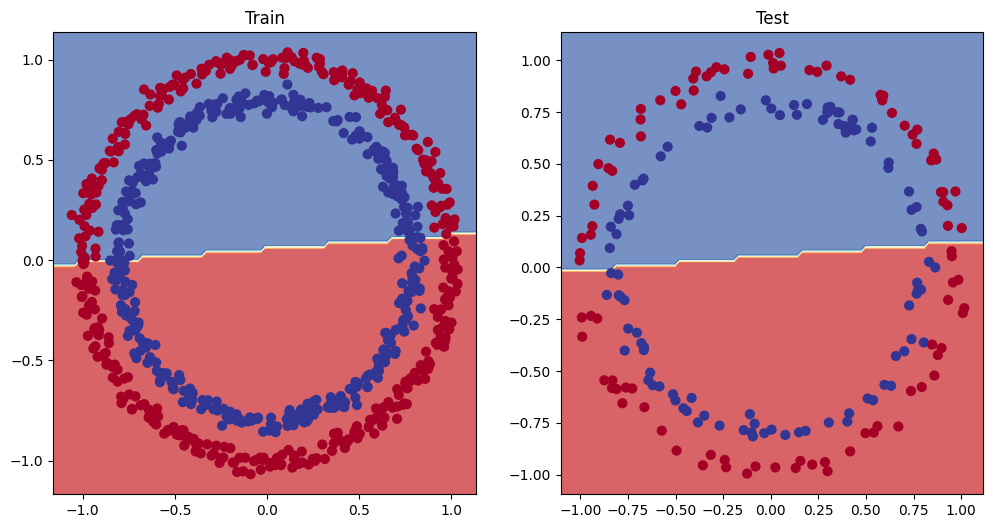

In [22]:
import requests
from pathlib import Path
if Path("helper_unctions.py").is_file():
  print("helper function file exists skip downloading")
else:
  requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)



In the model creation we have used Linear activation, may be we got less accuracy because the model is not fitting.

lets try fiiting this model to another data set and check the accuracy.

In [23]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)
X[:10]
y = weight*X+bias
y[:10]



tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])

In [24]:
train_split = int(len(X)*0.8)
print(train_split)
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train[:10]

80


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [25]:
def plot_prediction(X_train,X_test,y_train,y_test,predictions:None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c="b",s=4,label="train")
  plt.scatter(X_test,y_test,c="g",s=4,label="test")
  if predictions is not None:
    plt.scatter(X_test,predictions,c="r",s=4,label="prediction")
  plt.legend()
  plt.show

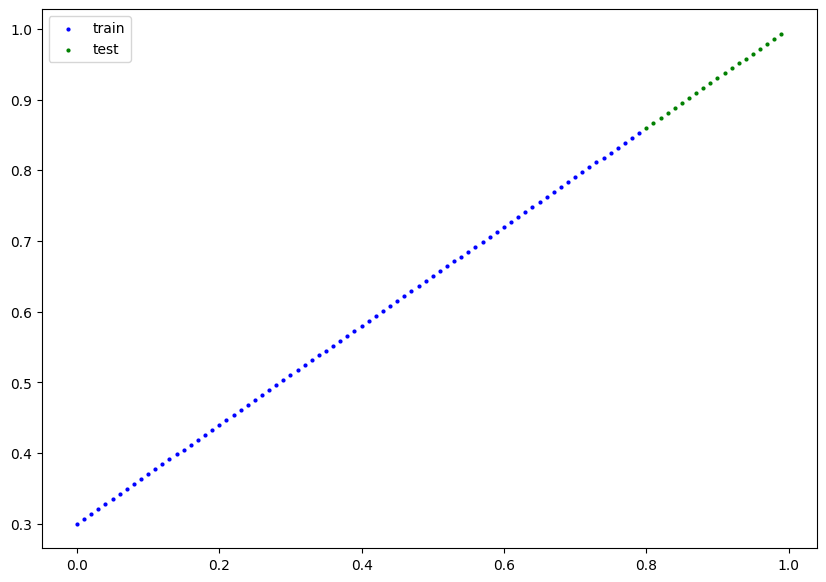

In [26]:
plot_prediction(X_train,X_test,y_train,y_test,predictions=None)

train and test this data with our model_0 and check the accuracy

In [27]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [28]:
model_1 = nn.Sequential(
          nn.Linear(in_features=1, out_features=10, bias=True),
          nn.Linear(in_features=10, out_features=1, bias=True)
)
model_1

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [30]:
#train the model
epochs = 100
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [31]:

model_1.eval()
with torch.inference_mode():

  y_pred =model_1(X_test)
  loss = loss_fn(y_pred,y_test)


  print(f"test_loss: {test_loss:.5f} ")

test_loss: 0.69401 


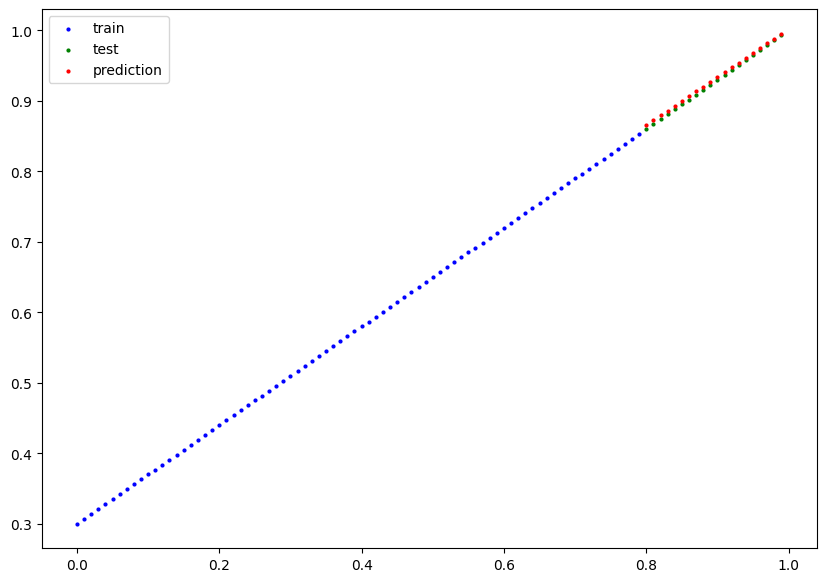

In [32]:
plot_prediction(X_train,X_test,y_train,y_test,y_pred)

with above results model_1 fits well with linear activation

Trying again with non linear activation

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)
#
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [34]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [35]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)
#

In [36]:
#train the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69803, Accuracy: 50.00% | Test Loss: 0.69614, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68990, Accuracy: 52.12% | Test Loss: 0.69056, Test Accuracy: 52.00%
Epoch: 200 | Loss: 0.68698, Accuracy: 55.38% | Test Loss: 0.68925, Test Accuracy: 51.00%
Epoch: 300 | Loss: 0.68311, Accuracy: 63.00% | Test Loss: 0.68716, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.67762, Accuracy: 64.75% | Test Loss: 0.68413, Test Accuracy: 58.00%
Epoch: 500 | Loss: 0.66929, Accuracy: 66.12% | Test Loss: 0.67880, Test Accuracy: 58.00%
Epoch: 600 | Loss: 0.65608, Accuracy: 68.88% | Test Loss: 0.66864, Test Accuracy: 60.50%
Epoch: 700 | Loss: 0.63431, Accuracy: 73.00% | Test Loss: 0.65007, Test Accuracy: 68.00%
Epoch: 800 | Loss: 0.59520, Accuracy: 83.75% | Test Loss: 0.61377, Test Accuracy: 79.00%
Epoch: 900 | Loss: 0.52096, Accuracy: 95.25% | Test Loss: 0.54205, Test Accuracy: 94.50%


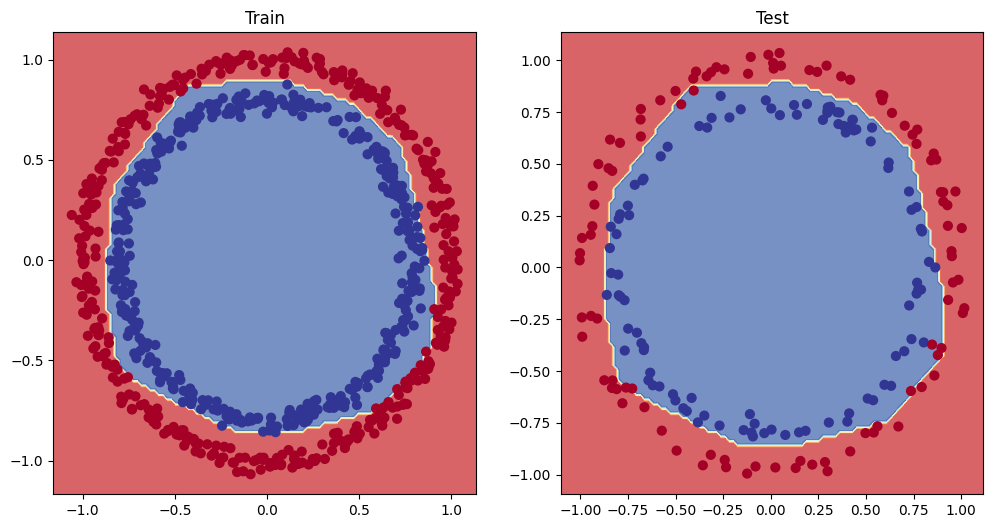

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)

plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [38]:
import torch
A = torch.arange(-10,10,1)
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [45]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

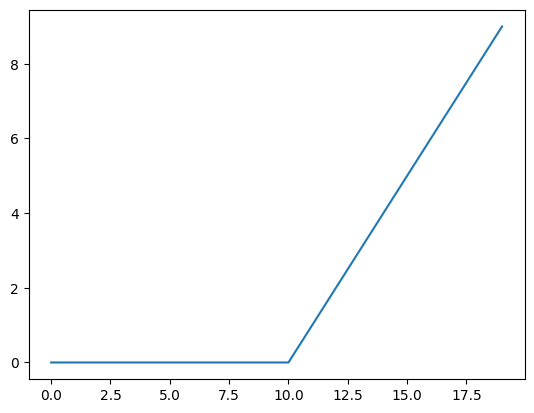

In [46]:
plt.plot(relu(A))